In [194]:
# Import libraries and packages
import openml
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# reduce display precision on numpy arrays
np.set_printoptions(precision=2)


In [204]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset directly from openML 
dataset_id = 44989
dataset = openml.datasets.get_dataset(dataset_id)
house, *_ = dataset.get_data()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [3]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

In [4]:
# Display the first 10 rows of the data
house.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014,10,13
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014,12,9
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015,2,25
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014,12,9
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015,2,18


In [18]:
# Assuming 'house' is your DataFrame
current_year = 2015  # Set the current year to 2015

# Calculate the age of the house and create a new 'age' column
house['age'] = current_year - house['yr_built']


In [19]:
house.tail(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day,age
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0.0,2009.0,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014,5,21,6.0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0.0,2014.0,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015,2,23,1.0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,0.0,2009.0,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014,6,23,6.0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,0.0,2004.0,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015,1,16,11.0
21612,325000.0,2,0.75,1020.0,1076.0,2.0,0,0,3,7,1020.0,0.0,2008.0,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014,10,15,7.0


/var/folders/67/4ltrm0810d91qhxpnv3hb4dc0000gn/T/ipykernel_14889/691150390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house.corr()


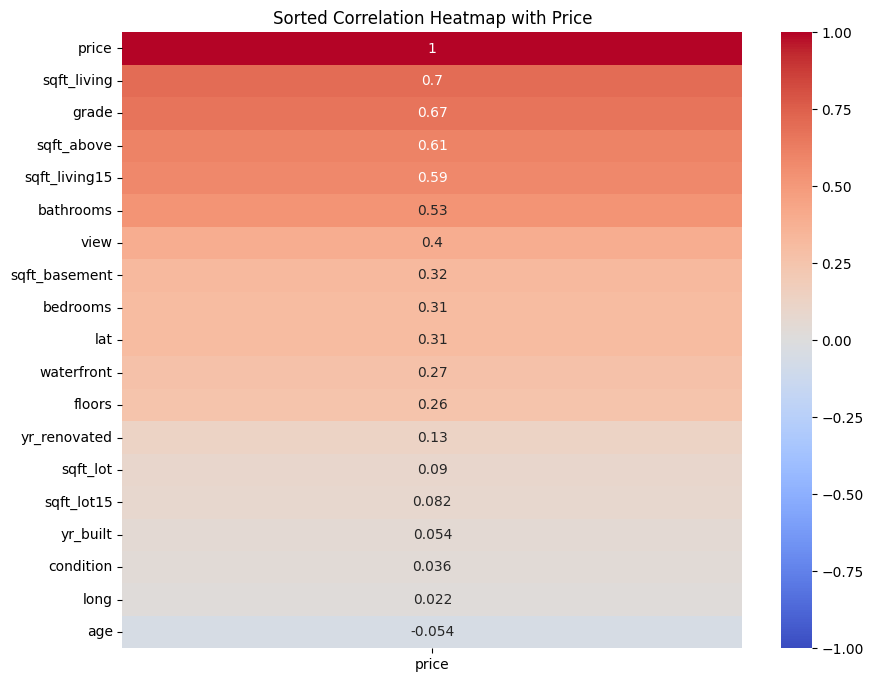

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr()

# Sort the correlation values with respect to 'price'
sorted_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Create a new correlation matrix based on the sorted order
sorted_correlation_matrix = correlation_matrix.loc[sorted_correlation.index, ['price']]

sns.heatmap(sorted_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sorted Correlation Heatmap with Price')
plt.show()

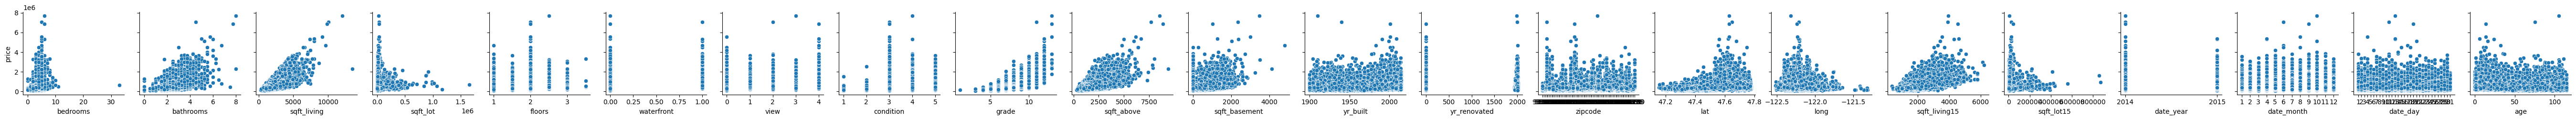

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month', 'date_day', 'age']


In [20]:
# pair plot
sns.pairplot(house, x_vars=house.columns[1:], y_vars='price')
plt.show()

columns_list = house.columns.tolist()
print(columns_list)

# Feature Scaling 

In [179]:
# Features
X_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'age']

# Extract features and target variable
X = house[X_features]
y = house['price']

# Extract features and target variable
X_train = house[X_features]
y_train = house['price']


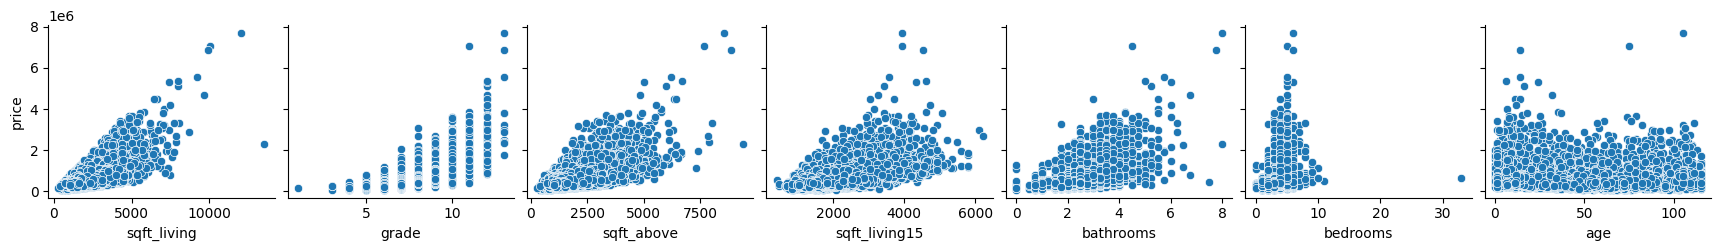

In [180]:
columns_of_interest = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','bedrooms','age']  # Add the columns you are interested in
subset_df = house[columns_of_interest]

sns.pairplot(house, x_vars=subset_df, y_vars='price')
plt.show()


**Question: What impact each feature of the house might have on price?**
 * Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

**Feature scaling**

In [181]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

**Z-score normalization**

In [182]:
mu = np.mean(X_train, axis=0)   
sigma = np.std(X_train, axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu) / sigma  

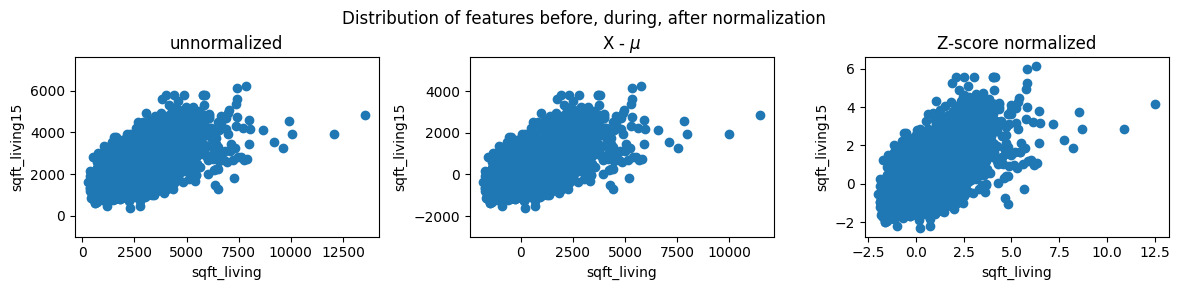

In [183]:
# Plot the scatterplot of the normalized features
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# Assuming 'X_train' is your DataFrame
ax[0].scatter(X_train[X_features[0]], X_train[X_features[3]])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[3])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[X_features[0]], X_mean[X_features[3]])
ax[1].set_xlabel(X_features[0])
ax[1].set_ylabel(X_features[3])
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[X_features[0]], X_norm[X_features[3]])
ax[2].set_xlabel(X_features[0])
ax[2].set_ylabel(X_features[3])
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribution of features before, during, after normalization")

# Display the plot
plt.show()


In [184]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range (max-min) by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range (max-min) by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = sqft_living      2079.899736
grade               7.656873
sqft_above       1788.390691
sqft_living15    1986.552492
bathrooms           2.114757
bedrooms            3.370842
age                43.994864
dtype: float64, 
X_sigma = sqft_living      918.419649
grade              1.175432
sqft_above       828.071820
sqft_living15    685.375448
bathrooms          0.770145
bedrooms           0.930040
age               29.372731
dtype: float64
Peak to Peak range (max-min) by column in Raw        X:sqft_living      13250.0
grade               12.0
sqft_above        9120.0
sqft_living15     5811.0
bathrooms            8.0
bedrooms            33.0
age                115.0
dtype: float64
Peak to Peak range (max-min) by column in Normalized X:sqft_living      14.426956
grade            10.209016
sqft_above       11.013537
sqft_living15     8.478565
bathrooms        10.387650
bedrooms         35.482333
age               3.915196
dtype: float64


In [185]:
# check our work
from sklearn.preprocessing import scale
is_not_equal = (X_norm != scale(X_train, axis=0, with_mean=True, with_std=True, copy=True))
print(f"Total number of observations with different results for feature scaling: {np.sum(is_not_equal)}")

Total number of observations with different results for feature scaling: sqft_living      0
grade            0
sqft_above       0
sqft_living15    0
bathrooms        0
bedrooms         0
age              0
dtype: int64


**Split the data into training and test sets**

In [186]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [187]:
# Implement feature scaling
scaler = StandardScaler() # Instantiate a StandardScaler object
# scalar = StandardScaler(with_std=False) # Mean normalization
# scalar = MinMaxScaler() # (x - min)/(max - min)
X_norm = scaler.fit_transform(X_train) # Fit and transform your data
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train, axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw        X:sqft_living      9260.00
grade              10.00
sqft_above       7500.00
sqft_living15    5811.00
bathrooms           6.75
bedrooms           10.00
age               115.00
dtype: float64
Peak to Peak range by column in Normalized X:[10.21  8.55  9.1   8.47  8.86 11.15  3.92]


In [188]:
# Training the regression model
sgdr = SGDRegressor(max_iter=20000) # Instantiate a SGDRegressor object
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=20000)
number of iterations completed: 18, number of weight updates: 194509.0


In [189]:
# Extract optimized parameter values from the trained model
b_norm = sgdr.intercept_ # Bias b
w_norm = sgdr.coef_ # Weights w
print(f"model parameters:w: {w_norm}, b:{b_norm}")


model parameters:w: [157177.63 156663.44 -19512.27  24615.43  48481.96 -46374.5  115036.94], b:[537861.66]


In [165]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:100]}" )
print(f"Target values \n{y_train[:100]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[ 540978.56 1092756.51  638574.35  537365.54  586601.95  383950.87
  631015.93  259629.94  554742.38  493152.2   652024.37  244123.93
 1162185.08  361421.19  650960.54  984376.89  653951.64  800467.42
  326348.86  266594.66  323189.68  545350.92  436712.26  431363.92
  684885.88  992315.32  336054.9   259577.83  940785.36  674094.07
  300847.86  565518.41  587838.    518562.8   308944.74  266203.56
 1063637.16  673523.55  709837.5   709729.17  727238.23  307742.07
  583808.    608856.73  423276.92  393480.55  153947.67  288212.52
  618848.65  631741.44  471101.63  746028.06  440428.11  382631.69
  254239.05  510412.51  910816.86 1075141.45  562062.26  367629.34
  362853.6   326109.2   322283.8  1115512.98  521214.38  416289.42
  685730.58  383192.81  474608.88  797598.27  190445.38  610504.49
  352210.91  856347.99  269754.44  799325.1   647860.77  653902.95
  617762.96 1201385.    553492.73  607767.81  

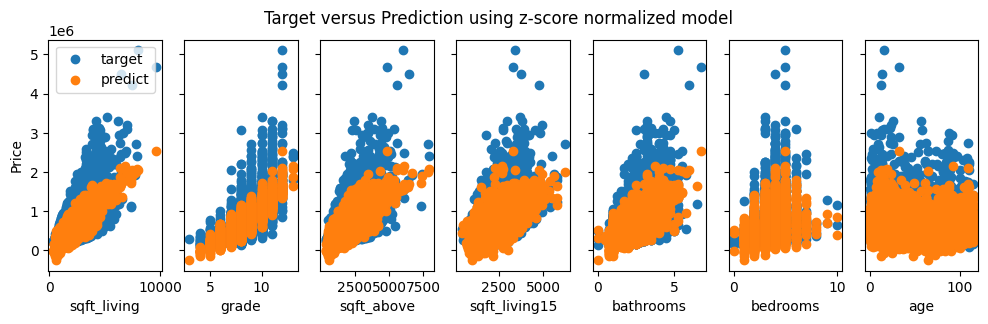

In [190]:
# Plot predictions and targets vs original features    
fig, ax = plt.subplots(1, 7, figsize=(12, 3), sharey=True)
for i, feature in enumerate(X_features):
    ax[i].scatter(X_train[feature], y_train, label='target')
    ax[i].set_xlabel(feature)
    ax[i].scatter(X_train[feature], y_pred, label='predict')

ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction using z-score normalized model")

# Display the plot
plt.show()

In [192]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w_norm + b_norm)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([2000,7,1500,1800,3,4,20]).reshape(-1,7)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with {x_house} is = ${x_house_predict:0.2f}")

Prediction on training set:
 [ 547841.52 1096439.2   646058.36  536803.39]
prediction using w,b:
 493      4.516681e+08
4253     4.614236e+08
18621    3.971778e+08
1463     1.982413e+08
dtype: float64
Target values 
 493      669950.0
4253     845000.0
18621    559950.0
1463     495000.0
Name: price, dtype: float64
 predicted price of a house with [[2000    7 1500 1800    3    4   20]] is = $371446.11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


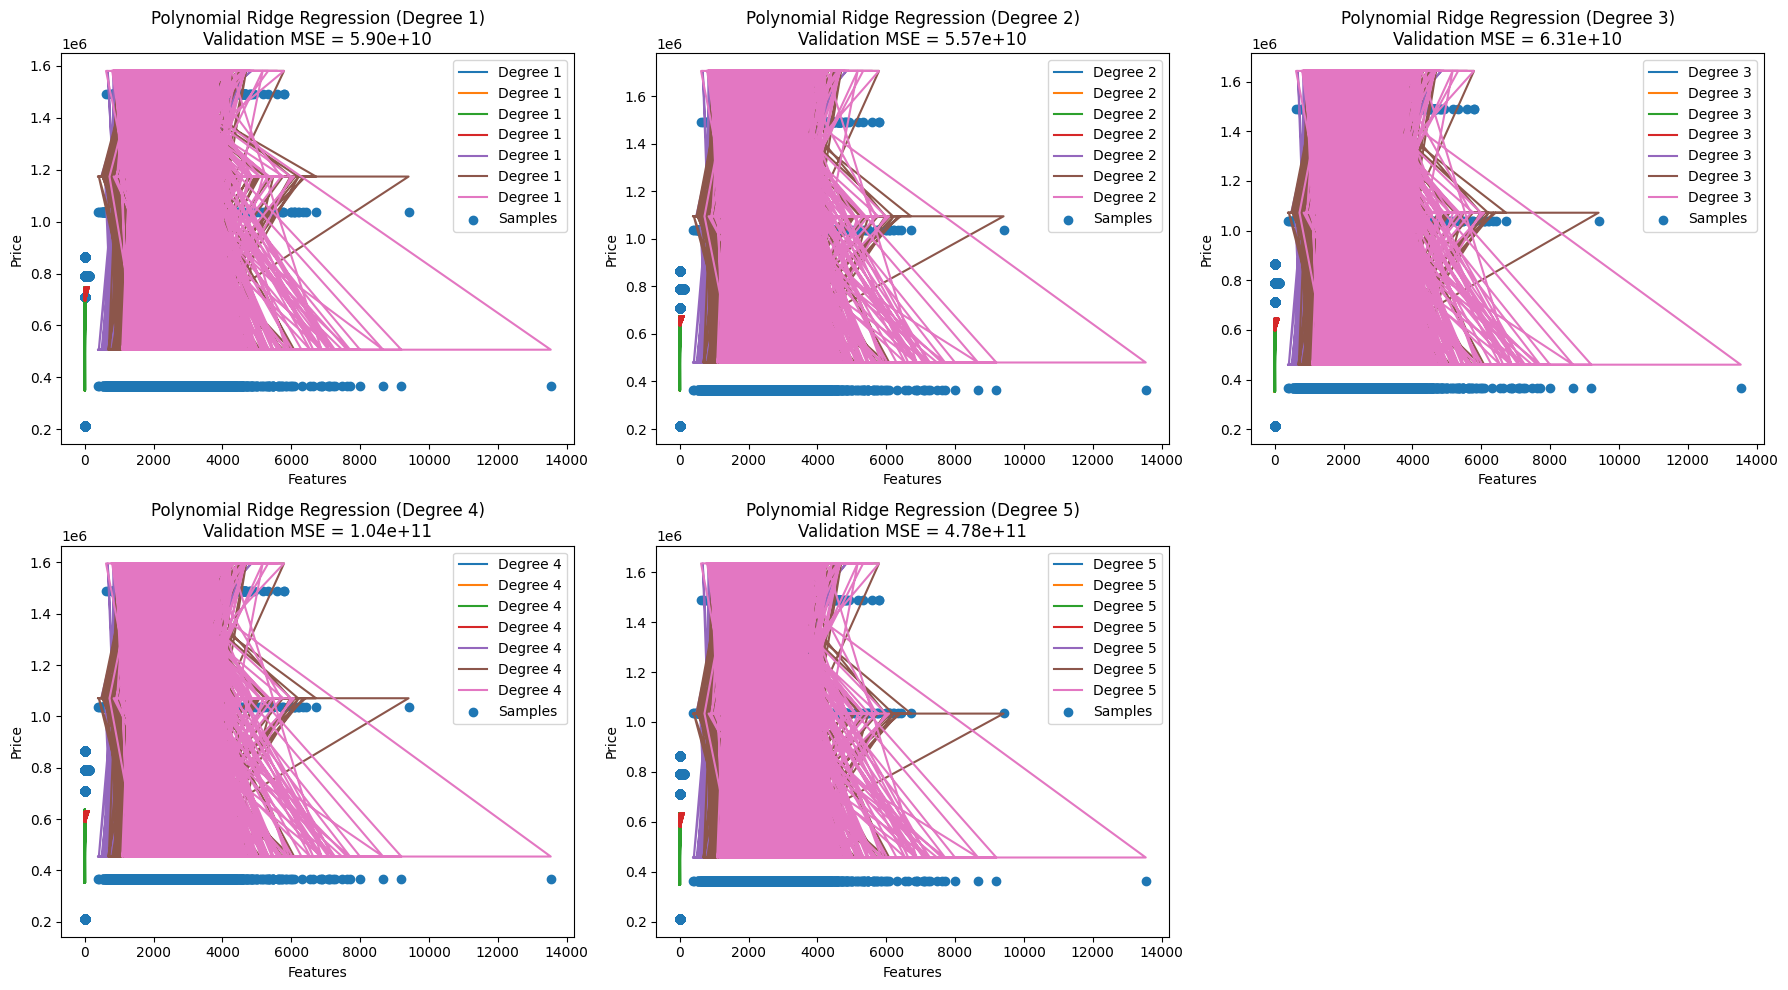

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'house' is your DataFrame
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'age']  # Replace with your features
target = 'price'  # Replace with your target variable

X = house[features].values
y = house[target].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(1, 6)  # Try degrees from 1 to 5
alpha = 1.0  # Adjust the regularization strength (alpha)

plt.figure(figsize=(18, 10))
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    ridge_regression = Ridge(alpha=alpha)
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("scaler", StandardScaler()),  # Standardize features before Ridge regression
        ("ridge_regression", ridge_regression)
    ])

    # Fit the entire pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Evaluate the models on the validation set
    y_pred_val = pipeline.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)

    # Plot the results
    plt.subplot(2, 3, degree)
    plt.plot(np.sort(X_val), y_pred_val[np.argsort(X_val)], label=f"Degree {degree}")
    plt.scatter(np.sort(X_val), y_val[np.argsort(X_val)], label="Samples")
    plt.xlabel("Features")
    plt.ylabel("Price")
    plt.legend(loc="best")
    plt.title(f"Polynomial Ridge Regression (Degree {degree})\nValidation MSE = {mse_val:.2e}")

plt.tight_layout()
plt.show()


**Applying scaling to train and test data**

In [133]:
# Assuming you already have X_train, X_test, y_train, y_test from the train-test split

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# If needed, you can also access the coefficients of the model
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

# You can also include standardization using a pipeline
ridge_model_with_standardization = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

# Train the model with standardization
ridge_model_with_standardization.fit(X_train, y_train)

# Make predictions on the test set with standardization
y_pred_standardized = ridge_model_with_standardization.predict(X_test)

# Evaluate the standardized model
mse_standardized = mean_squared_error(y_test, y_pred_standardized)
print(f'Mean Squared Error with Standardization: {mse_standardized}')


Mean Squared Error: 58999494402.65724
Mean Squared Error with Standardization: 58999829356.69359


In [140]:
# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range (max-min) by column in Normalized X: {np.ptp(X,axis=0)}")

Peak to Peak range (max-min) by column in Normalized X: sqft_living      14.426956
grade            10.209016
sqft_above       11.013537
sqft_living15     8.478565
bathrooms        10.387650
bedrooms         35.482333
age               3.915196
dtype: float64


Mean Squared Error: 58999494402.65724
Mean Squared Error with Standardization: 58999829356.69359
